
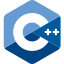
<br>

<div style="text-align:center; font-size:200%;">
 <b>Vektor-Implementierung (V1)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Vektor-Implementierung (V1).ipynb -->
<!-- slides/module_140_collections/topic_160_my_vector_v1.cpp -->


## `MyVector`-Klasse

- Die `std::vector`-Klasse verwendet viele Features und Techniken, die in C++
  häufig eingesetzt werden.
- Wir wollen versuchen eine eigene, einfache Version von `std::vector` zu
  implementieren.
- Dabei sehen wir, welche Sprachfeatures und Techniken wir dafür benötigen.


## Sehr naive Implementierung

- Wir beginnen mit einer sehr naiven Implementierung.
  - Nur für `int`-Werte.
  - Wesentlich weniger benutzerfreundlich.
  - Sehr viel fehleranfälliger.


<img src="../img/vector-01.png" width="75%">


<img src="../img/vector-02.png" width="75%">


<img src="../img/vector-03.png" width="100%">


<img src="../img/vector-04.png" width="100%">


<img src="../img/vector-05.png" width="90%">

In [ ]:
struct MyVector {
    int* data;
    std::size_t size;
    std::size_t capacity;
};

In [ ]:
void init(MyVector& vec) {
    vec.data = nullptr;
    vec.size = 0;
    vec.capacity = 0;
}

In [ ]:
void destroy(MyVector& vec) {
    delete[] vec.data;
    vec.data = nullptr;
    vec.size = 0;
    vec.capacity = 0;
}

In [ ]:
void push_back(MyVector& vec, int value) {
    if (vec.size == vec.capacity) {
        std::size_t new_capacity = vec.capacity == 0 ? 1 : vec.capacity * 2;
        int* new_data = new int[new_capacity];
        for (std::size_t i = 0; i < vec.size; ++i) {
            new_data[i] = vec.data[i];
        }
        delete[] vec.data;
        vec.data = new_data;
        vec.capacity = new_capacity;
    }
    vec.data[vec.size] = value;
    ++vec.size;
}

In [ ]:
int at(MyVector& vec, std::size_t index) {
    // The `at()` method should do bounds checking...
    return vec.data[index];
}

In [ ]:
std::size_t size(const MyVector& vec) {
    return vec.size;
}

In [ ]:
std::size_t capacity(const MyVector& vec) {
    return vec.capacity;
}

In [ ]:
#include <iostream>

In [ ]:
void print(const MyVector& vec) {
    std::cout << "[";
    for (std::size_t i = 0; i < vec.size; ++i) {
        std::cout << vec.data[i];
        if (i < vec.size - 1) {
            std::cout << ", ";
        }
    }
    std::cout << "]";
}

In [ ]:
void print_info(const MyVector& vec) {
    std::cout << "size: " << size(vec) << "\n";
    std::cout << "capacity: " << capacity(vec) << "\n";
    std::cout << "data: ";
    print(vec);
    std::cout << "\n";
}


## Verwendung

- Erzeugen eines `MyVector`-Objekts


- Hinzufügen von Elementen
- Zugriff auf Elemente

In [ ]:
print_info(vec);

In [ ]:
at(vec, 0)


- Hinzufügen weiterer Elemente
- Beachten Sie den Unterschied zwischen `size` und `capacity`

In [ ]:
push_back(vec, 20);

In [ ]:
print_info(vec);

In [ ]:
push_back(vec, 30);

In [ ]:
print_info(vec);

In [ ]:
at(vec, 2)

In [ ]:
push_back(vec, 40);
print_info(vec);

In [ ]:
push_back(vec, 50);
print_info(vec);


- Zerstören des `MyVector`-Objekts


## Probleme

- `MyVector`-Objekte müssen nach der Erzeugung mit `init()`
  initialisiert werden.
  - Diese Two-Step-Initialization ist fehleranfällig.
- `MyVector`-Objekte müssen nach der Verwendung mit `destroy()`
  zerstört werden.
  - Selbst wenn sie in lokalen Variablen gespeichert werden:

In [ ]:
{
    MyVector vec;
    init(vec);
    // Array for `vec.data` created here...
    push_back(vec, 1);
    // Oops, forgot to call `destroy()`...
}
// Array for `vec.data` leaked here...


<img src="../img/vector-memory-leak.png" width="75%">


## Probleme

- `MyVector`-Objekte werden nicht richtig kopiert.
  - `MyVector vec2 = vec;`
  - Kopiert die Struct
  - Kopiert **nicht** die Daten auf dem Heap
- Damit können `MyVector`-Objekte nicht "per value" übergeben werden.

In [ ]:
{
    MyVector vec;
    init(vec);
    push_back(vec, 1);
    push_back(vec, 2);

    MyVector vec2 = vec; // Oops, shallow copy!

    print_info(vec);
    print_info(vec2);

    destroy(vec);
    // destroy(vec2); // Oops, double free!
}


<img src="../img/vector-copy-error-1.png" width="75%">

In [ ]:
{
    MyVector vec;
    init(vec);
    push_back(vec, 1);
    push_back(vec, 2);
    push_back(vec, 3);
    MyVector vec2 = vec;

    push_back(vec, 4); // Oops, inconsistent data!

    print_info(vec);
    print_info(vec2);

    destroy(vec);
}


<img src="../img/vector-copy-error-2.png" width="75%">

In [ ]:
{
    MyVector vec;
    init(vec);
    push_back(vec, 1);
    push_back(vec, 2);

    MyVector vec2 = vec;

    push_back(vec, 3); // Oops, reallocates!

    print_info(vec);
    print_info(vec2);

    destroy(vec);
}


<img src="../img/vector-copy-error-3.png" width="75%">


<img src="../img/vector-copy-error-4.png" width="75%">


<img src="../img/vector-copy-error-5.png" width="75%">


- Rückgabe von `MyVector`-Objekten ist möglich.
- Aber das ist eher Zufall als Design.

In [ ]:
MyVector return_vec() {
    MyVector res;
    init(res);
    push_back(res, 1);
    push_back(res, 2);
    return res;
}

In [ ]:
MyVector vec = return_vec();
print_info(vec);
destroy(vec);


<img src="../img/vector-return-1.png" width="75%">


<img src="../img/vector-return-2.png" width="75%">


<img src="../img/vector-return-3.png" width="75%">


<img src="../img/vector-return-4.png" width="75%">


## Return Value Optimization (RVO)

<br><br>
<img src="../img/vector-return-5.png" width="75%">


## Probleme

- Die Daten von `MyVector`-Objekten sind öffentlich:

In [ ]:
{
    MyVector vec;
    init(vec);
    push_back(vec, 1);
    push_back(vec, 2);
    print_info(vec);

    vec.data[0] = 42;
    vec.size = 5;
    print_info(vec);

    destroy(vec);
}


## Probleme

- Wir können keine Operatoren wie `[]` oder `<<` verwenden.